In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
differencing = pd.DataFrame({'data': [8, 13, 18, 14, 13, 18, 24, 20, 18, 24, 27, 22, 20, 28, 32, 29, 28, 30, 37, 34]})
differencing.index = range(1,len(differencing)+1)

In [4]:
differencing

,data
1,8
2,13
3,18
4,14
5,13
6,18
7,24
8,20
9,18
10,24


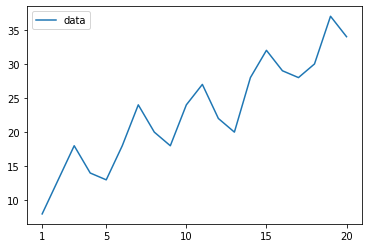

In [5]:
differencing.plot(xticks=[1, 5,10,15,20])
plt.show()

In [6]:
differencing['diff_1'] = differencing.diff()
differencing

,data,diff_1
1,8,NaN
2,13,5.0
3,18,5.0
4,14,-4.0
5,13,-1.0
6,18,5.0
7,24,6.0
8,20,-4.0
9,18,-2.0
10,24,6.0


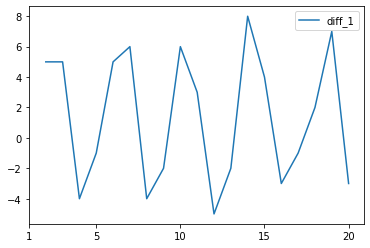

In [7]:
differencing.plot(y='diff_1', xticks=[1, 5,10,15,20])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.DataFrame(differencing['data'])
data.index = range(1, len(data)+1)
data

,data
1,8
2,13
3,18
4,14
5,13
6,18
7,24
8,20
9,18
10,24


In [10]:
model = LinearRegression()
fitted = model.fit(data.index.values.reshape(-1, 1), data.data.values)

In [11]:
predicted = fitted.predict([[i] for i in range(1, 21)])

In [12]:
data['predicted'] = predicted
data['diff'] = data['predicted'] - data['data']

In [13]:
data

,data,predicted,diff
1,8,11.357143,3.357143
2,13,12.566917,-0.433083
3,18,13.776692,-4.223308
4,14,14.986466,0.986466
5,13,16.196241,3.196241
6,18,17.406015,-0.593985
7,24,18.615789,-5.384211
8,20,19.825564,-0.174436
9,18,21.035338,3.035338
10,24,22.245113,-1.754887


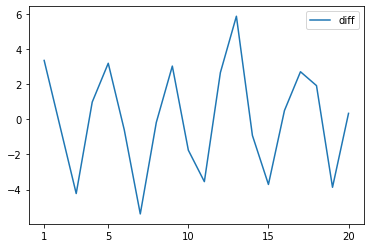

In [14]:
data.plot(y='diff', xticks=[1, 5,10,15,20])
plt.show()